In [1]:
import zarr
import dask_image.ndfilters
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np

from skimage import color, util, filters, measure

In [2]:
za = zarr.open('http://s3-far.jax.org/zarrtest/histopath_example.zarr', mode='r')

In [3]:
fullsize = za['0/0']
small = za['0/5'][...]  # This will immediate load as a numpy array
print(type(small), small.shape)

<class 'numpy.ndarray'> (1, 3, 1, 1528, 3420)


In [4]:
small = np.moveaxis(small[0,:,0,:,:], 0, -1)
small.shape

(1528, 3420, 3)

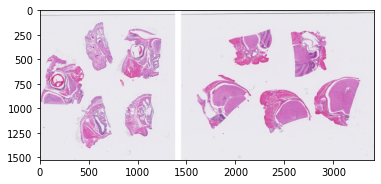

In [5]:
plt.imshow(small);

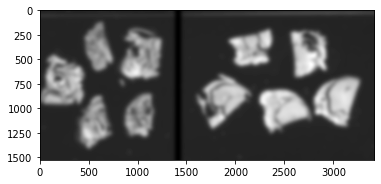

In [6]:
smallg = color.rgb2gray(small)
smallg = util.invert(smallg)
small_blurred = filters.gaussian(smallg, 20)
plt.imshow(small_blurred, cmap='gray');

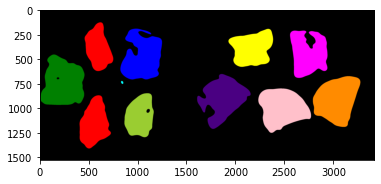

In [7]:
mask = small_blurred > filters.threshold_li(small_blurred)
labels = measure.label(mask)
plt.imshow(color.label2rgb(labels));

In [8]:
props = measure.regionprops(labels)

props = [x for x in props if x.area > 1000]

for prop in props:
    print(prop.bbox)

(125, 455, 622, 748)
(190, 820, 708, 1246)
(192, 1924, 579, 2380)
(210, 2553, 692, 2935)
(453, 3, 967, 454)
(652, 1604, 1211, 2151)
(674, 2786, 1191, 3271)
(799, 2229, 1251, 2767)
(848, 862, 1296, 1161)
(869, 404, 1411, 724)


In [15]:
for prop in props:
    y0, x0, y1, x1 = prop.bbox
    crop = fullsize[0, :, 0, y0:y1, x0:x1]
    print(type(crop))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
